In [1]:
from pyiron import Project

In [2]:
pr = Project("upscale")

# Energy volume curve 

## For loop

In [3]:
import numpy as np

In [5]:
strain_lst = np.linspace(0.9, 1.1, 11)

In [9]:
alat_guess = pr.create.structure.ase.bulk("Fe", cubic=True).cell[0,0]
alat_guess

2.87

In [10]:
for strain in strain_lst:
    job_name = "job_sphinx_" + str(np.round(strain, 2)).replace(".", "_")
    job = pr.create_job(pr.job_type.Sphinx, job_name)
    job.structure = pr.create.structure.ase.bulk("Fe", a=alat_guess * strain)
    job.run()

The job job_sphinx_0_9 was saved and received the ID: 2
The job job_sphinx_0_92 was saved and received the ID: 3
The job job_sphinx_0_94 was saved and received the ID: 4
The job job_sphinx_0_96 was saved and received the ID: 5
The job job_sphinx_0_98 was saved and received the ID: 6
The job job_sphinx_1_0 was saved and received the ID: 7
The job job_sphinx_1_02 was saved and received the ID: 8
The job job_sphinx_1_04 was saved and received the ID: 9
The job job_sphinx_1_06 was saved and received the ID: 10
The job job_sphinx_1_08 was saved and received the ID: 11
The job job_sphinx_1_1 was saved and received the ID: 12


In [11]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2,finished,Fe,job_sphinx_0_9,/job_sphinx_0_9,/home/jovyan/,upscale/,2021-03-24 15:44:20.422048,2021-03-24 15:44:23.407420,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
1,3,finished,Fe,job_sphinx_0_92,/job_sphinx_0_92,/home/jovyan/,upscale/,2021-03-24 15:44:24.331808,2021-03-24 15:44:27.310827,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
2,4,finished,Fe,job_sphinx_0_94,/job_sphinx_0_94,/home/jovyan/,upscale/,2021-03-24 15:44:28.032774,2021-03-24 15:44:31.268029,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
3,5,finished,Fe,job_sphinx_0_96,/job_sphinx_0_96,/home/jovyan/,upscale/,2021-03-24 15:44:31.997866,2021-03-24 15:44:34.624700,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
4,6,finished,Fe,job_sphinx_0_98,/job_sphinx_0_98,/home/jovyan/,upscale/,2021-03-24 15:44:35.343605,2021-03-24 15:44:38.069699,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
5,7,finished,Fe,job_sphinx_1_0,/job_sphinx_1_0,/home/jovyan/,upscale/,2021-03-24 15:44:38.789359,2021-03-24 15:44:41.504315,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
6,8,finished,Fe,job_sphinx_1_02,/job_sphinx_1_02,/home/jovyan/,upscale/,2021-03-24 15:44:42.287629,2021-03-24 15:44:45.414680,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
7,9,finished,Fe,job_sphinx_1_04,/job_sphinx_1_04,/home/jovyan/,upscale/,2021-03-24 15:44:46.141310,2021-03-24 15:44:49.314060,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
8,10,finished,Fe,job_sphinx_1_06,/job_sphinx_1_06,/home/jovyan/,upscale/,2021-03-24 15:44:50.062039,2021-03-24 15:44:53.136917,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
9,11,finished,Fe,job_sphinx_1_08,/job_sphinx_1_08,/home/jovyan/,upscale/,2021-03-24 15:44:53.890419,2021-03-24 15:44:57.403237,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None


In [12]:
for code in ["Lammps", "Sphinx"]:
    for strain in strain_lst:
        job_name = "job_" + code.lower() + "_" + str(np.round(strain, 2)).replace(".", "_")
        job = pr.create_job(code, job_name)
        job.structure = pr.create.structure.ase.bulk("Fe", a=alat_guess * strain)
        job.run()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_0_9 was saved and received the ID: 13


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_0_92 was saved and received the ID: 14


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_0_94 was saved and received the ID: 15


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_0_96 was saved and received the ID: 16


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_0_98 was saved and received the ID: 17


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_0 was saved and received the ID: 18


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_02 was saved and received the ID: 19


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_04 was saved and received the ID: 20


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_06 was saved and received the ID: 21


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_08 was saved and received the ID: 22


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job job_lammps_1_1 was saved and received the ID: 23


2021-03-24 15:46:38,757 - pyiron_log - WARNING - The job job_sphinx_0_9 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_base/generic/datacontainer.py:338: UserWarning: The input in Group changed, while the state of the job was already finished.
  "finished.".format(cls.__name__)
2021-03-24 15:46:41,639 - pyiron_log - WARNING - The job job_sphinx_0_92 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2021-03-24 15:46:44,502 - pyiron_log - WARNING - The job job_sphinx_0_94 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2021-03-24 15:46:47,492 - pyiron_log - WARNING - The job job_sphinx_0_96 is being loaded instead of running. To re-run use the argument 'delete_existing_job=True in create_job'
2021-03-24 15:46:50,772 - pyiron_log - WARNING - The job job_sphinx_0_98 

In [13]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,2,finished,Fe,job_sphinx_0_9,/job_sphinx_0_9,/home/jovyan/,upscale/,2021-03-24 15:44:20.422048,2021-03-24 15:44:23.407420,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
1,3,finished,Fe,job_sphinx_0_92,/job_sphinx_0_92,/home/jovyan/,upscale/,2021-03-24 15:44:24.331808,2021-03-24 15:44:27.310827,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
2,4,finished,Fe,job_sphinx_0_94,/job_sphinx_0_94,/home/jovyan/,upscale/,2021-03-24 15:44:28.032774,2021-03-24 15:44:31.268029,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
3,5,finished,Fe,job_sphinx_0_96,/job_sphinx_0_96,/home/jovyan/,upscale/,2021-03-24 15:44:31.997866,2021-03-24 15:44:34.624700,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
4,6,finished,Fe,job_sphinx_0_98,/job_sphinx_0_98,/home/jovyan/,upscale/,2021-03-24 15:44:35.343605,2021-03-24 15:44:38.069699,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
5,7,finished,Fe,job_sphinx_1_0,/job_sphinx_1_0,/home/jovyan/,upscale/,2021-03-24 15:44:38.789359,2021-03-24 15:44:41.504315,2.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
6,8,finished,Fe,job_sphinx_1_02,/job_sphinx_1_02,/home/jovyan/,upscale/,2021-03-24 15:44:42.287629,2021-03-24 15:44:45.414680,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
7,9,finished,Fe,job_sphinx_1_04,/job_sphinx_1_04,/home/jovyan/,upscale/,2021-03-24 15:44:46.141310,2021-03-24 15:44:49.314060,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
8,10,finished,Fe,job_sphinx_1_06,/job_sphinx_1_06,/home/jovyan/,upscale/,2021-03-24 15:44:50.062039,2021-03-24 15:44:53.136917,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None
9,11,finished,Fe,job_sphinx_1_08,/job_sphinx_1_08,/home/jovyan/,upscale/,2021-03-24 15:44:53.890419,2021-03-24 15:44:57.403237,3.0,pyiron@jupyter-pyiron-2dswimm-2dworkshop-2d2021-2dovw6c5fp#1,Sphinx,2.6.1,None,None


## Analysis 

In [14]:
import matplotlib.pyplot as plt

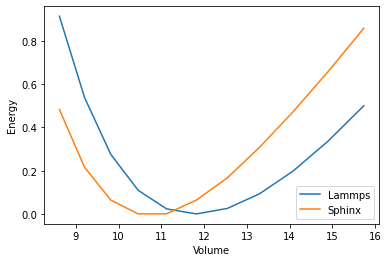

In [21]:
for code in ["Lammps", "Sphinx"]:
    vol_lst, eng_lst = [], []
    for job in pr.iter_jobs(convert_to_object=False):
        if code.lower() in job.job_name: 
            vol_lst.append(job["output/generic/volume"][-1])
            eng_lst.append(job["output/generic/energy_tot"][-1])
    plt.plot(vol_lst, eng_lst - np.min(eng_lst), label=code)
plt.xlabel("Volume")
plt.ylabel("Energy")
plt.legend()

# pyiron table 

In [22]:
def filter_function(job):
    return "job_" in job.job_name 

In [23]:
def get_code_type(job):
    return job.job_name.split("_")[1]

def get_volume(job):
    return job["output/generic/volume"][-1]

def get_energy(job):
    return job["output/generic/energy_tot"][-1]

In [24]:
table = pr.create.table()

In [25]:
table.filter_function = filter_function

In [26]:
table.add["code"] = get_code_type
table.add["volume"] = get_volume
table.add["energy"] = get_energy

In [27]:
table.run()

 27%|██▋       | 6/22 [00:00<00:00, 54.59it/s]

The job table was saved and received the ID: 24


100%|██████████| 22/22 [00:00<00:00, 47.21it/s]


In [28]:
df = table.get_dataframe()
df

,job_id,code,volume,energy
0,2,sphinx,8.616748,-3385.116736
1,3,sphinx,9.204049,-3385.383718
2,4,sphinx,9.817459,-3385.535477
3,5,sphinx,10.457543,-3385.599695
4,6,sphinx,11.124849,-3385.598855
5,7,sphinx,11.819954,-3385.535566
6,8,sphinx,12.543421,-3385.432672
7,9,sphinx,13.295844,-3385.291651
8,10,sphinx,14.077755,-3385.127643
9,11,sphinx,14.889748,-3384.943380


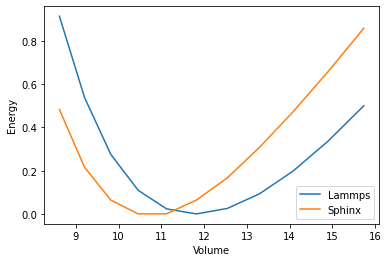

In [29]:
for code in ["Lammps", "Sphinx"]:
    df_tmp = df[df.code == code.lower()]
    plt.plot(df_tmp.volume, df_tmp.energy - np.min(df_tmp.energy), label=code)
plt.xlabel("Volume")
plt.ylabel("Energy")
plt.legend()

# Murnaghan 

In [30]:
job_temp = pr.create.job.Lammps("lmp")
job_temp.structure = pr.create.structure.ase.bulk("Fe")

In [31]:
murn = job_temp.create_job(pr.job_type.Murnaghan, "murn")

In [32]:
murn.input

,Parameter,Value,Comment
0,num_points,11,number of sample points
1,fit_type,polynomial,"['polynomial', 'birch', 'birchmurnaghan', 'murnaghan', 'pouriertarantola', 'vinet']"
2,fit_order,3,order of the fit polynom
3,vol_range,0.1,relative volume variation around volume defined by ref_ham


In [33]:
murn.run()

The job murn was saved and received the ID: 25


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_0_9 was saved and received the ID: 26


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_0_92 was saved and received the ID: 27


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_0_94 was saved and received the ID: 28


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_0_96 was saved and received the ID: 29


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_0_98 was saved and received the ID: 30


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_0 was saved and received the ID: 31


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_02 was saved and received the ID: 32


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_04 was saved and received the ID: 33


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_06 was saved and received the ID: 34


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_08 was saved and received the ID: 35


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job strain_1_1 was saved and received the ID: 36
job_id:  26 finished
job_id:  27 finished
job_id:  28 finished
job_id:  29 finished
job_id:  30 finished
job_id:  31 finished
job_id:  32 finished
job_id:  33 finished
job_id:  34 finished
job_id:  35 finished
job_id:  36 finished


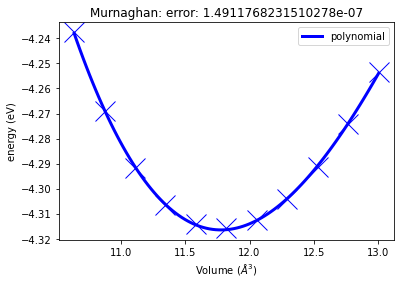

In [34]:
murn.plot()

In [39]:
(2 * murn["output/equilibrium_volume"]) ** (1/3)

2.8666050197030106

# Interactive mode 

In [43]:
job_temp = pr.create.job.Lammps("lmp")
job_temp.structure = pr.create.structure.ase.bulk("Fe", cubic=True)
job_temp.server.run_mode.interactive = True

In [44]:
murn = job_temp.create_job(pr.job_type.Murnaghan, "murn_int")

2021-03-24 16:07:53,895 - pyiron_log - WARNING - Job aborted - please remove it and run again! murn_int


In [45]:
murn.run(delete_existing_job=True)

The job murn_int was saved and received the ID: 37


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/base.py:238: UserWarning: No potential set via job.potential - use default potential, 1997--Ackland-G-J--Fe--LAMMPS--ipr1
  warnings.warn("No potential set via job.potential - use default potential, " + lst_of_potentials[0])


The job murn_int_lmp was saved and received the ID: 38


/srv/conda/envs/notebook/lib/python3.7/site-packages/pyiron_atomistics/lammps/interactive.py:108: UserWarning: Warning: setting upper trangular matrix might slow down the calculation
  "Warning: setting upper trangular matrix might slow down the calculation"


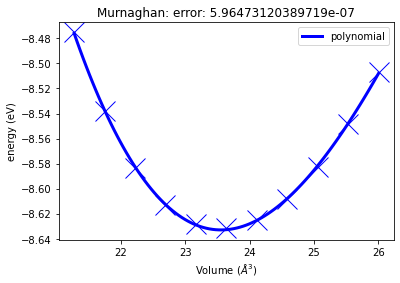

In [46]:
murn.plot()

# Surface 

In [55]:
structure = pr.create.structure.surface("Al", surface_type="fcc111", vacuum=5.0, size=(4,4,1), orthogonal=True)

In [58]:
structure.plot3d(particle_size=3)

NGLWidget()

In [59]:
structure.cell

Cell([11.45512985522207, 9.92043345827187, 5.0])

In [60]:
structure.apply_strain([0.2, 0.2, 0])

In [61]:
structure.cell

Cell([13.746155826266484, 11.904520149926244, 5.0])

# Grainboundary 

In [63]:
fcc_al = pr.create.structure.ase.bulk("Al", cubic=True)

In [67]:
grain_boundary = pr.create.structure.aimsgb.build(axis=[1,0,0], sigma=5, plane=[0, 1, 2], initial_struct=fcc_al)

In [69]:
grain_boundary.plot3d(particle_size=3)

NGLWidget()

In [72]:
df = pr.job_table()
len(df[df.status == "running"])

0